In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [2]:
df = pd.read_csv("C:/Users/Windows10/Downloads/Amazon Sale Report.csv")
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.00,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

### 1. In the data set Two columns (New and PendingS) contain no data, so we need to remove the columns.

In [5]:
df.shape

(128976, 21)

In [6]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

In [8]:
df.drop(['New','PendingS'], axis= 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

<Axes: >

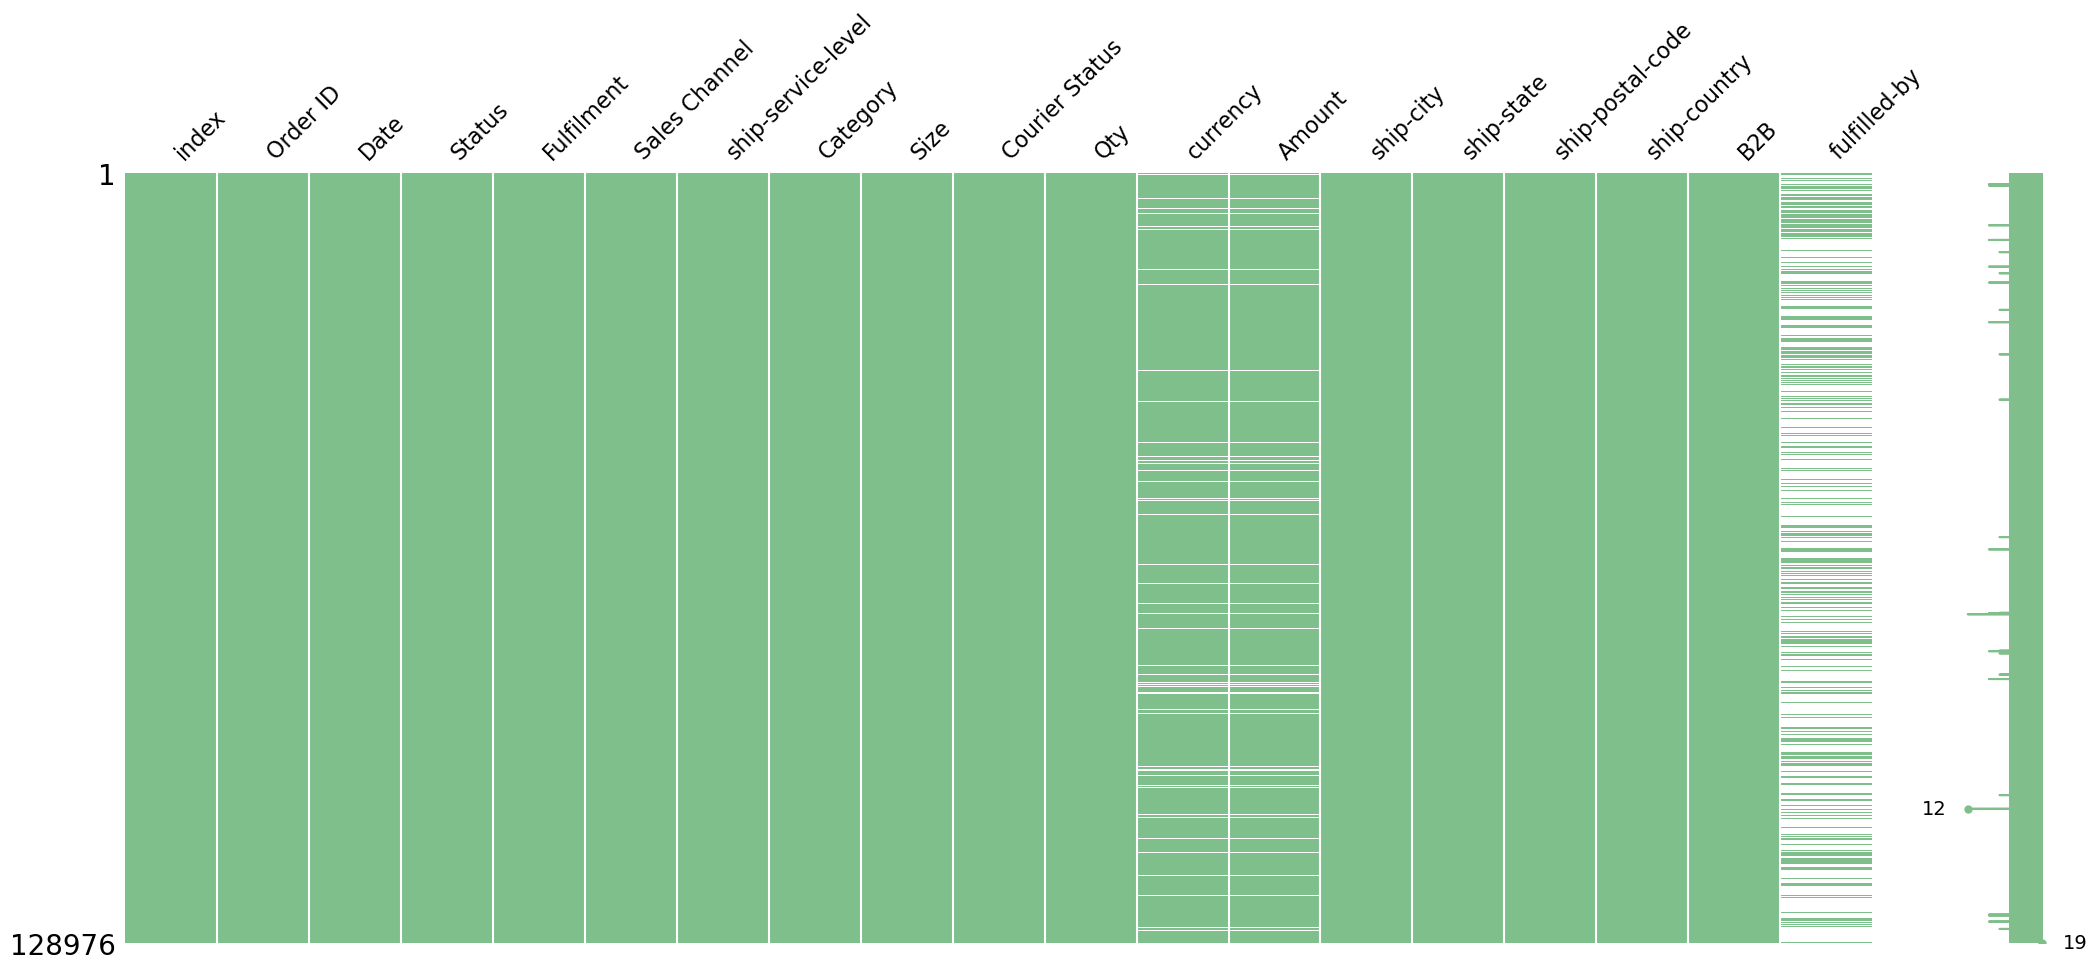

In [13]:
msno.matrix(df,color= (0.5, 0.75, 0.55))

In [14]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

### 2. Here Columns (currency ,Amount and fulfilled-by) contains more missing values and columns like ship-city, ship-state, ship-postal-code and  ship-country contains less missing values. This needs to be  cleared.

In [16]:
df.dropna(inplace = True)

In [18]:
df.shape

(37514, 19)

<Axes: >

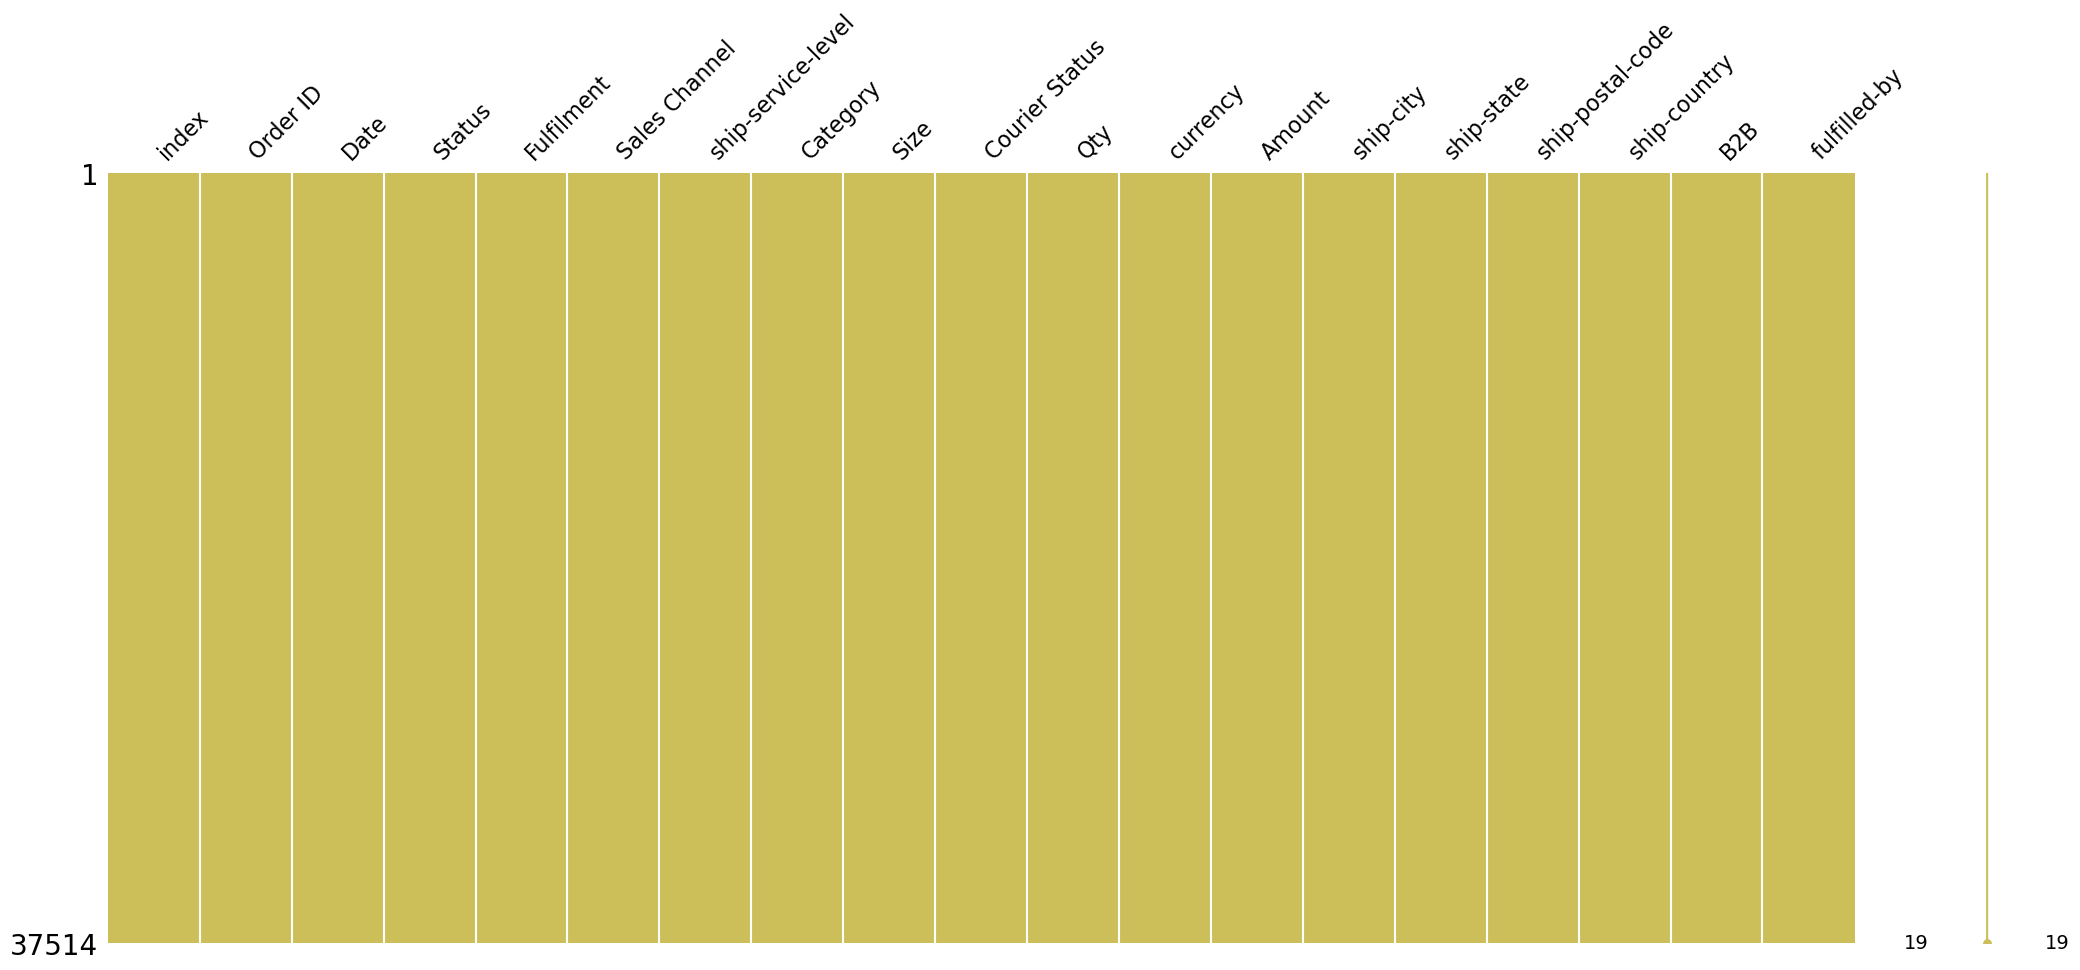

In [20]:
msno.matrix(df,color= (0.8, 0.75, 0.35))

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  float64
 16  shi

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [29]:
df.rename(columns ={'Qty':'Quantity'}, inplace =True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Quantity            37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object   

In [37]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

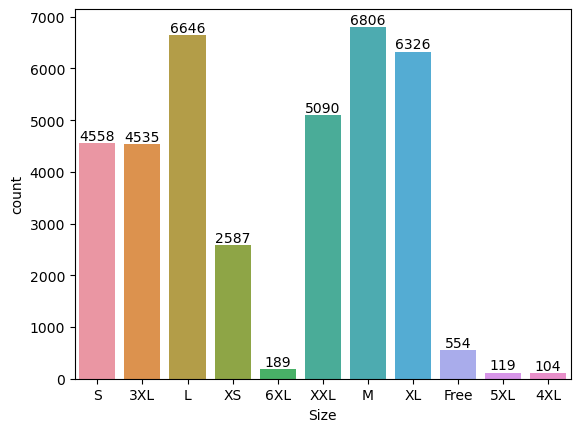

In [41]:
size = sns.countplot(x='Size',data = df)

for bars in size.containers:
    size.bar_label(bars)

### Note: From above graph we can see most of the people buys M-size.

In [42]:
df.groupby(['Size'], as_index = False)['Quantity'].sum().sort_values(by='Quantity',ascending = False)

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


<Axes: xlabel='Size', ylabel='Quantity'>

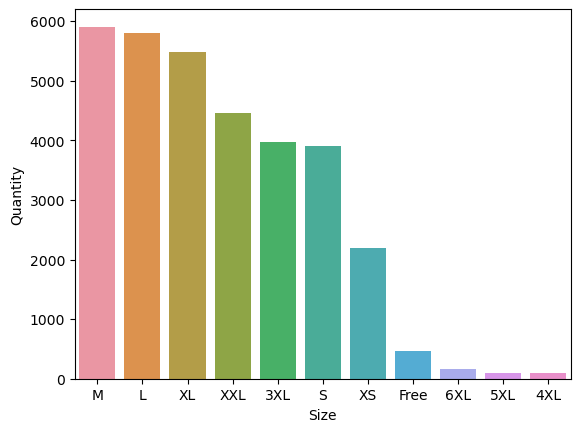

In [45]:
sale = df.groupby(['Size'], as_index = False)['Quantity'].sum().sort_values(by='Quantity',ascending = False)

sns.barplot(sale, x = 'Size', y = 'Quantity')

### Note: From the above graph we can see that most quantity buys m-size in the sales.

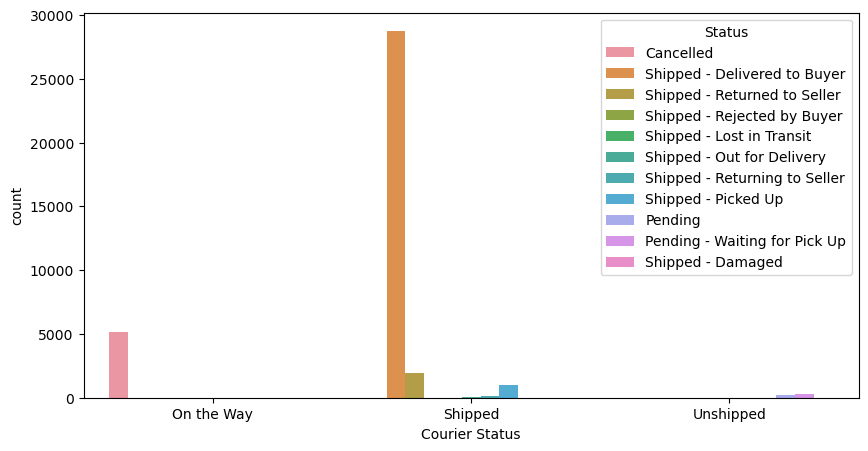

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'Courier Status', hue = 'Status')
plt.show()

### Note: From the above graph most of the orders are shipped through the courier.

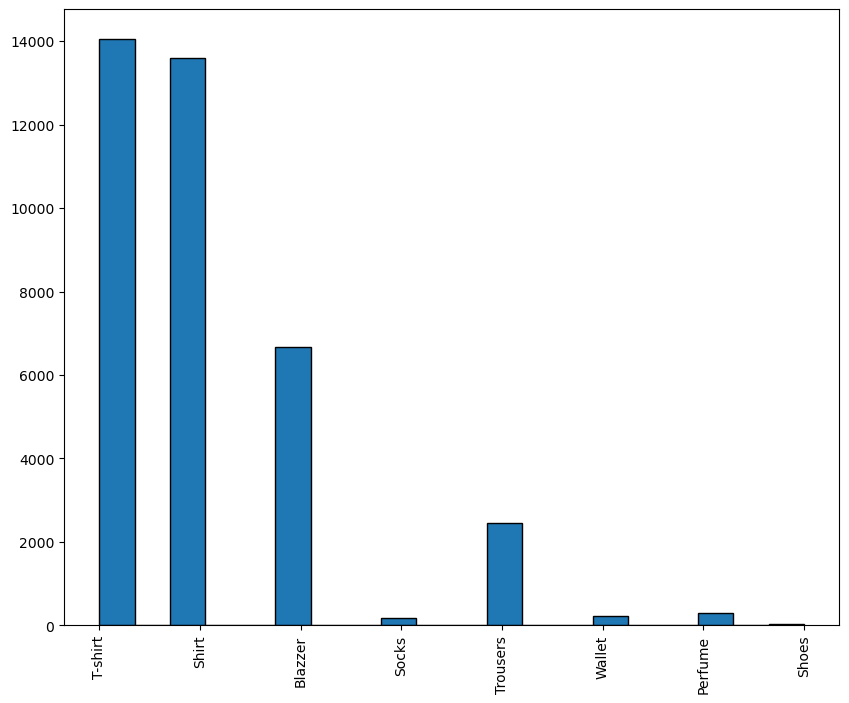

In [52]:
df['Category'] = df['Category'].astype(str)
categ = df['Category']
plt.figure(figsize=(10,8))
plt.hist(categ, bins = 20 , edgecolor = "Black")
plt.xticks(rotation = 90)
plt.show()

### Note: From the above graph we can see that most of the category sold are T-shirt.

In [53]:
B2B = df['B2B'].value_counts()
B2B

False    37228
True       286
Name: B2B, dtype: int64

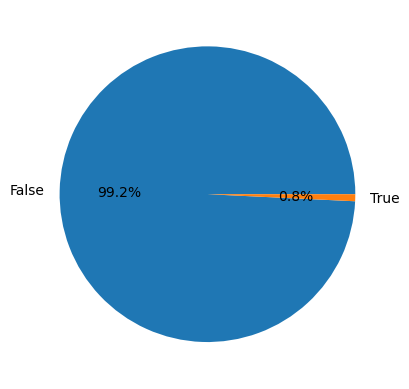

In [55]:
plt.pie(B2B, labels = B2B.index, autopct='%1.1f%%')
plt.show()

### Note: from the above chart we can see that maximum buyers are retailers, which is 99.2% and B2b buyers are only 0.8%.

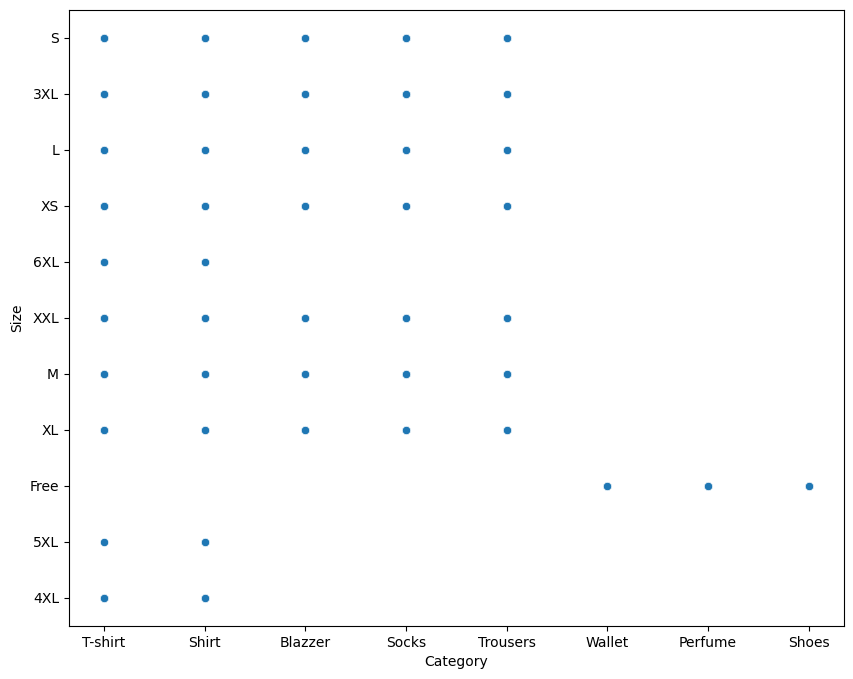

In [67]:
plt.figure(figsize=(10,8))
sns.scatterplot(df,x = 'Category', y = 'Size')
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

### Note: T-shirt and Shirt have all type of size except Free.

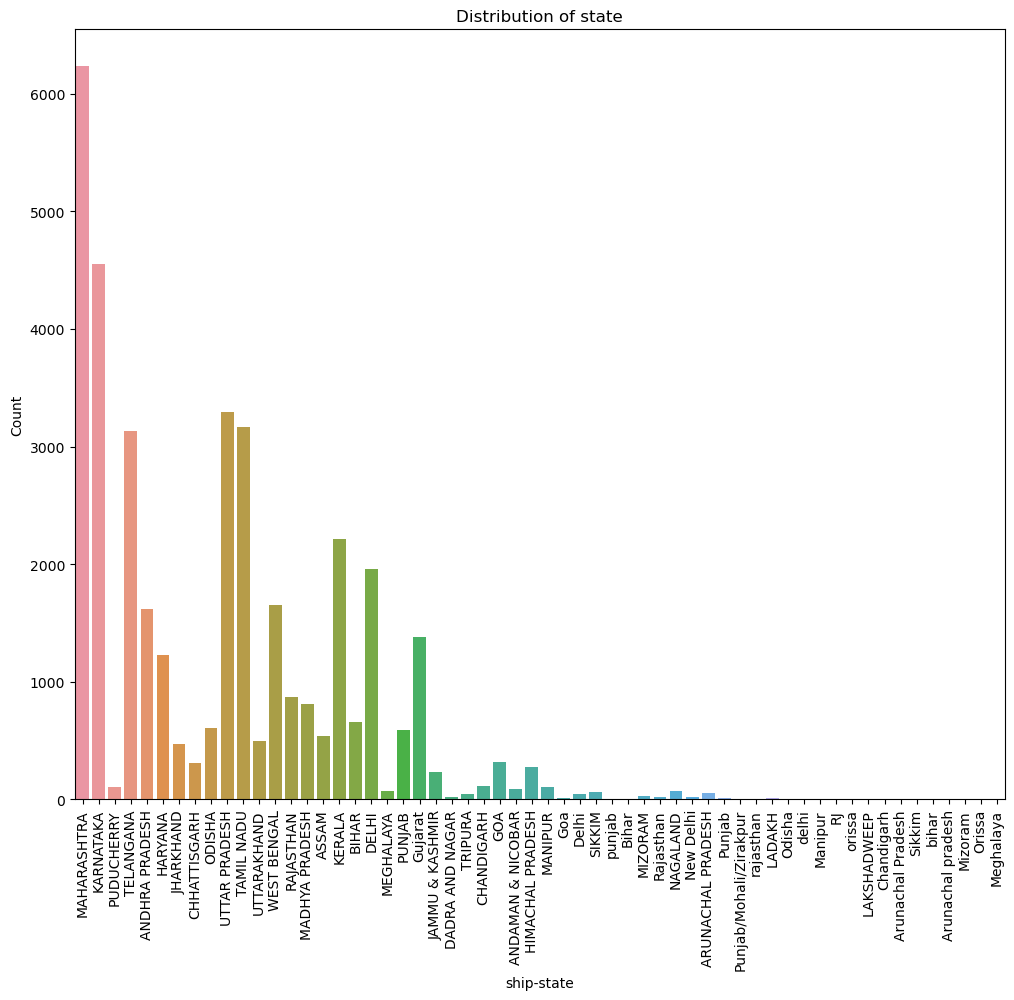

In [72]:
plt.figure(figsize=(12,10))
sns.countplot(data = df, x = 'ship-state')
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('Distribution of state')
plt.xticks(rotation=90)
plt.show()

In [73]:
top_10_state = df['ship-state'].value_counts().head(10)
top_10_state

MAHARASHTRA       6236
KARNATAKA         4550
UTTAR PRADESH     3298
TAMIL NADU        3167
TELANGANA         3136
KERALA            2213
DELHI             1955
WEST BENGAL       1653
ANDHRA PRADESH    1621
Gujarat           1382
Name: ship-state, dtype: int64

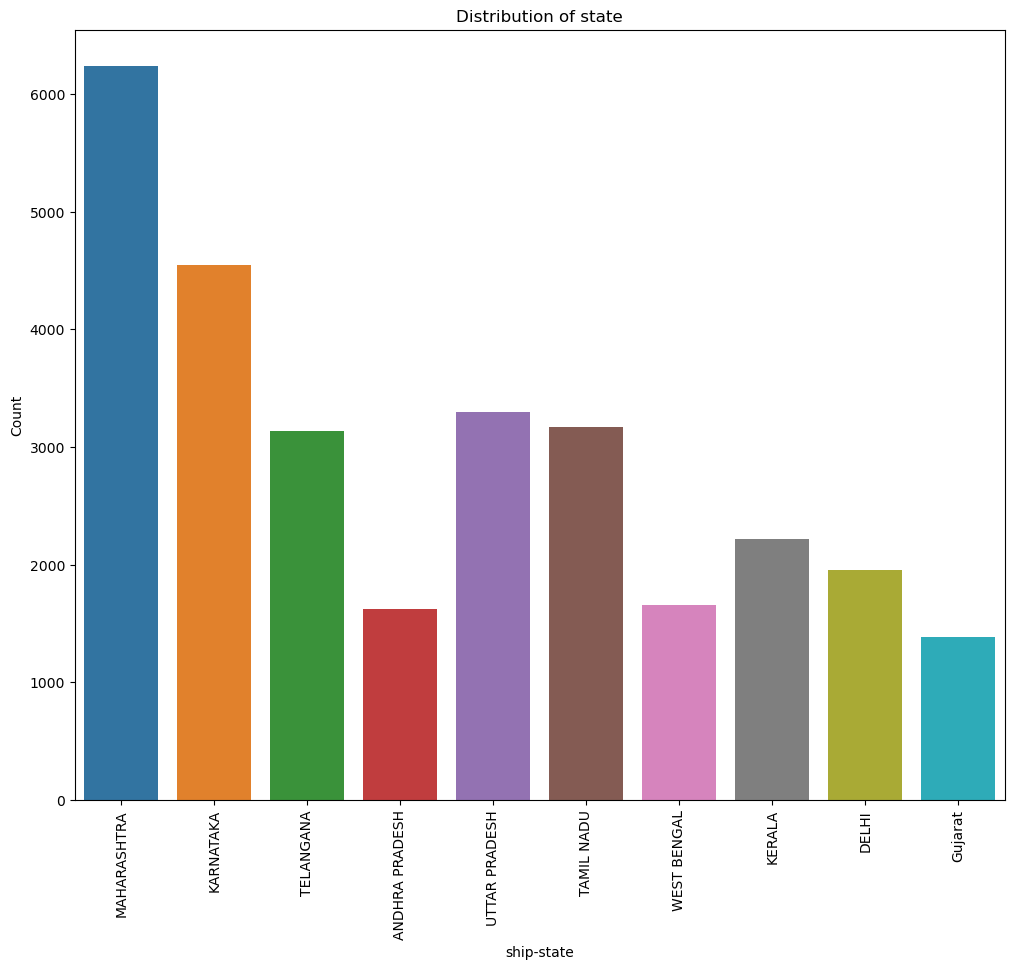

In [74]:
plt.figure(figsize=(12,10))
sns.countplot(data = df[df['ship-state'].isin(top_10_state.index)], x = 'ship-state')
plt.xlabel('ship-state')
plt.ylabel('Count')
plt.title('Distribution of state')
plt.xticks(rotation=90)
plt.show()

### Note: from above graph we can see that most of the buyers are in Maharashtra State.

## Conclusion 

#### The data analysis reveals that business has a significant customer base in Maharashtra, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts and sees M-size as the preferred choice among buyers.